In [1]:
import sys
sys.path.append('../')
import macro_tQ as tQ

import numpy as np
import scipy.linalg as la
from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.tools.visualization import array_to_latex

In [2]:
'angulos de medida'
phi_divs = 100
phi_list=np.linspace(0,2*np.pi,phi_divs) #lista de angulos'

'lista de correlaciones C[i] a calcular'
C=[0,0,0,0]

'lista de valores de R'
R=np.zeros(phi_divs)

'Numero de medidas'
nshots = 2048

from qiskit import QuantumCircuit, Aer, execute
M_simulator = Aer.get_backend('qasm_simulator')

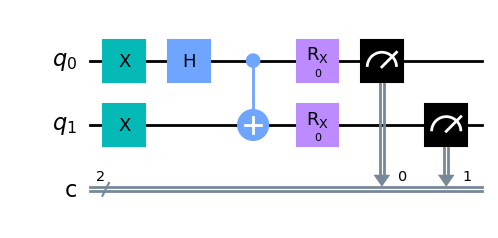

In [3]:
for j in range(phi_divs): 

    'ángulos de medida'
    phi=phi_list[j] 
    '''A' = 2\phi, A = B = phi, B' = 0'''
    angles_AB=[[phi,phi],[2*phi,phi],[phi,0],[2*phi,0]] # AB , A'B , AB', A'B'

    for i in range(4):        
        'una pareja de ángulos uno para A y otro para B '
        ang_AB=angles_AB[i]

        'hay un circuito para cada proceso de medida'
        qc=QuantumCircuit(2,2)
        'creamos el par de Bell B(11)'
        qc.x(0)
        qc.x(1)
        qc.h(0)
        qc.cx(0,1)

         
        'simulamos la medida en la base de los polarizadores de A y B rotados en torno al eje x'
        qc.rx(-ang_AB[0],0)  # notar el valor negativo del ángulo de rotación 
        qc.rx(-ang_AB[1],1)
        qc.measure([0,1],[0,1])
        
        if j ==0 and i ==0:
            display(qc.draw('mpl'))
        ' medimos '
        counts=execute(qc,backend = M_simulator,shots = nshots).result().get_counts()         
        'construimos el correlador'
        C[i]= 0 
        for bitstring, counts in counts.items():
            C[i] += (-1)**(sum([int(bit) for bit in bitstring])) * counts/nshots 

    'construimos la cantidad R'
    R[j]=np.abs(C[0]+C[1]+C[2]-C[3])

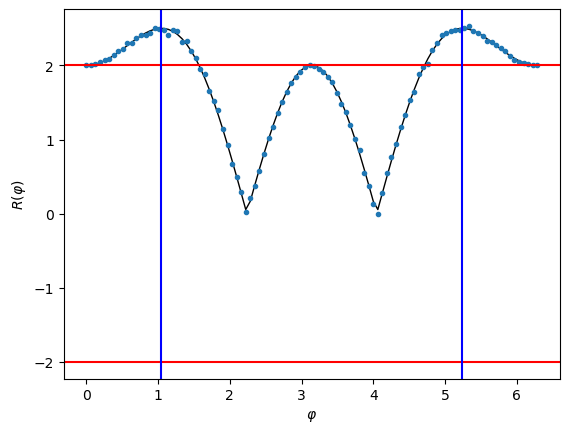

In [4]:
' función analítica '
fx= np.abs(1 + 2*np.cos(phi_list) - np.cos(2*phi_list))
plt.plot(phi_list,fx,'k-',linewidth=1)

' resultado de la simulación'
plt.plot(phi_list,R,'.')
plt.axhline(y = 2, color = 'r', linestyle = '-')
plt.axhline(y = -2, color = 'r', linestyle = '-')

' líneas horizotales en +2 y - 2'
plt.axvline(x = np.pi/3, color = 'b', linestyle = '-')
plt.axvline(x = 5*np.pi/3, color = 'b', linestyle = '-')
plt.xlabel(r'$\varphi$')
plt.ylabel(r'$R(\varphi)$')
plt.show()

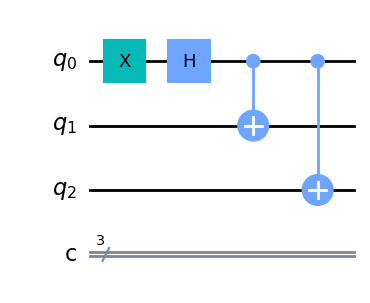

In [5]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute

qc_GHZ = QuantumCircuit(3,3) 

qc_GHZ.x(0)
qc_GHZ.h(0)
qc_GHZ.cx(0,1)
qc_GHZ.cx(0,2)

qc_GHZ.draw(output='mpl')

In [6]:
from qiskit import Aer, execute

M_backend = Aer.get_backend('qasm_simulator')
shots=1000


'elige uno de los términos siguientes'
#multibasis = 'YYX'
#multibasis = 'YXY'
#multibasis = 'XYY'
multibasis = 'XXX'

qc_GHZ.barrier()
mc_add_measure_XYZ(qc_GHZ, multibasis)
qc_GHZ.draw(output='mpl')

NameError: name 'mc_add_measure_XYZ' is not defined

In [7]:
cuentas_GHZ = execute(qc_GHZ,M_backend,shots=shots).result().get_counts()
print('<'+str(multibasis)+'> =', mc_val_esp_sigma(cuentas_GHZ)[0])

QiskitError: 'No counts for experiment "0"'